### Практическое задание 4

<span style="color:blue"> **Задача №1**</span><br>

Найти частную производную
$\dfrac{\partial^6 u}{\partial x^3 \partial y^3}$

$u = x^3 \sin y + y^3 \sin x$.

In [2]:
import sympy as sp
from sympy.abc import x,y
from sympy import init_printing, pretty, latex, pprint
init_printing()

In [9]:
u = x**3 * sp.sin(y) + y**3 * sp.sin(x)
u

In [5]:
print("Шестая частная производная функции u, равна: ")
display(sp.diff(u, x,3, y,3))

Шестая частная производная функции u, равна: 


___

<span style="color:blue"> **Задача №2**</span><br>

Найдите частные производные для $f = e^x(\cos(y) + x \sin(y))$.

Также постройте график функции в 3D. <br>
Подберите адекватные ограничения по осям x и y. <br>
Постройте график в 2D, укажите градиент, а также его компоненты в точках $(0,0)$, $(5,1.8)$, $(5.5,-2)$.


In [3]:
import math
import decimal
import numpy as np
import sympy as sp
from sympy.abc import x,y,e
from numpy import cos, sin
from matplotlib import cm
import matplotlib.pyplot as plt
from sympy.plotting import plot3d 
from sympy import init_printing, pretty, latex, pprint
init_printing()

In [2]:
# Выражение для расчета 
expression = "e**x*(cos(y) + x*sin(y))"

# Оформим функцию нахождения частных производных
pdiffs = [sp.diff(sp.simplify(expression).subs(e, sp.E), var) for var in (x, y)]
pdiffFunc = sp.lambdify([x,y], pdiffs)

print("Частная производная по x:")
display(pdiffs[0])
print("Частная производная по y:")
display(pdiffs[1])

Частная производная по x:


Частная производная по y:


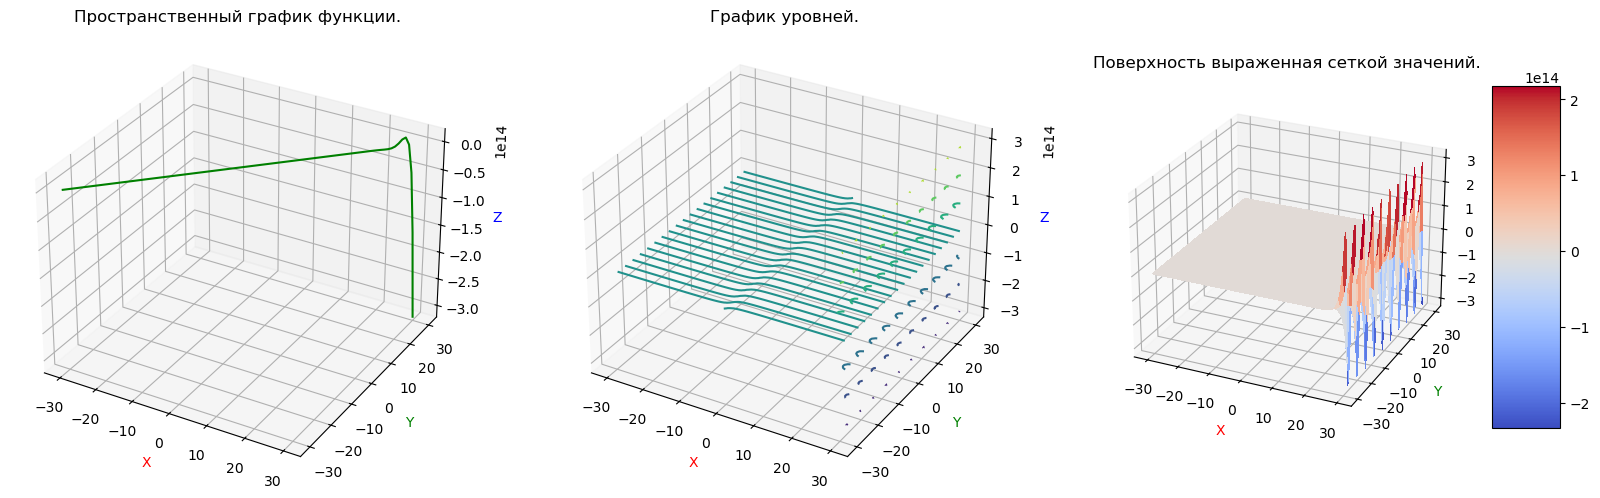

In [3]:
def func(x, y):
    """ Функция описания выражения.
    """
    return sp.E**x*(cos(y) + x*sin(y))

def setPlotLabels(ax):
    """ Функция установки меток плоскости.
    """
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('green')
    ax.zaxis.label.set_color('blue')

# найдем область значений для графика
x = np.linspace(-30, 30, 100)
y = np.linspace(-30, 30, 100)
z = func(x,y)

# найдем область значений для трехмерной кривой в виде поверхности
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# Построим два пространственных графика.
# Выраженной линиии в пространстве и поверхности от функции
fig, ax = plt.subplots(ncols=3, figsize=(20, 11), subplot_kw={'projection': '3d'})
ax[0].plot3D(x, y, z, 'green')
ax[0].set_title('Пространственный график функции.')
setPlotLabels(ax[0])

ax[1].contour(X, Y, Z.astype('float64'))
ax[1].set_title('График уровней.')
setPlotLabels(ax[1])

surface = ax[2].plot_surface(X, Y, Z.astype('float64'), cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surface, shrink=0.5, aspect=5)
ax[2].set_title('Поверхность выраженная сеткой значений.')
ax[2].view_init(25, -65)
setPlotLabels(ax[2])

plt.show()

In [4]:
def createGradVectors(point):
    """ Функция отрисовки векторов на плоскости градиента
        по заранее заданным точкам.
    """
    assert len(point) == 2
    dxy = pdiffFunc(float(point[0]), float(point[1]))
    
    def isExtremum(ddxy) -> str:
        assert len(ddxy) == 2
        if  np.isclose(float(ddxy[0]), 0, atol=1e-03) and \
            np.isclose(float(ddxy[1]), 0, atol=1e-03):
            return str(" (экстремум)")
        return str()        
    
    print(f"Значения чаcтных производных в точке M({point[0]:.1f}, {point[1]:.1f}):",
        f"dx={dxy[0]:.2f}, dy={dxy[1]:.2f}{isExtremum(dxy)}")
    
    mix_ = list(zip(
        [[1,0],[0,1]], 
        dxy
    ))

    scale = 10
    if np.isclose(float(dxy[0]), 0) or np.isclose(float(dxy[1]), 0):
       scale = 1
        
    vectors = np.array([(np.array(v[0])*v[1]/scale) for v in mix_])
    vectors = np.append(
        vectors, 
        vectors[0] + vectors[1]
    ).reshape(3, 2).astype(np.float64)
    
    startPos = np.append(
        np.full(3, float(point[0])), 
        np.full(3, float(point[1]))
    ).reshape(2, 3)

    plt.quiver(
        *startPos, 
        vectors[:,0], 
        vectors[:,1], 
        color=['r','b','m'], 
        scale_units='y', 
        scale=scale
    )

Значения чаcтных производных в точке M(0.0, 0.0): dx=1.00, dy=0.00
Значения чаcтных производных в точке M(5.0, 1.8): dx=833.47, dy=-313.13
Значения чаcтных производных в точке M(5.5, -2.0): dx=-1548.06, dy=-337.56
Значения чаcтных производных в точке M(-20.0, 0.0): dx=0.00, dy=-0.00 (экстремум)
Значения чаcтных производных в точке M(5.0, 20.0): dx=873.52, dy=167.33


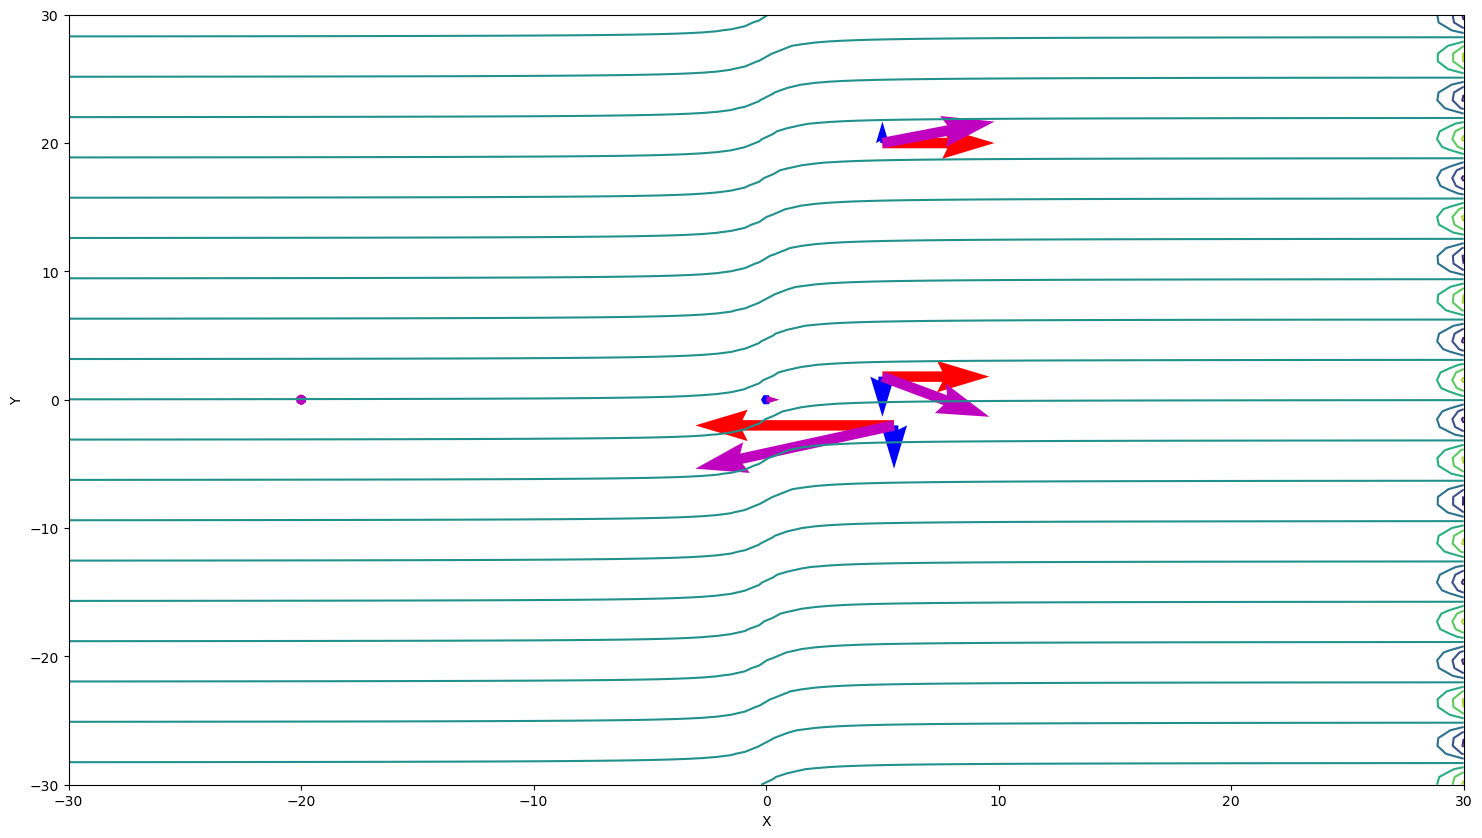

In [5]:
x,y = sp.symbols("x,y")

# Начальные точки в виде матрицы значений, 
# в которых необходимо определить значение и направлшение градиента
Points = sp.Matrix([[0,0],[5,1.8],[5.5,-2],[-20,0],[5,20]])

# Построим градиент функции и выделим направление градиента в виде векторов
fig = plt.figure(figsize=(18, 10))

# Рисуем контур графика по сетке значений
plt.contour(X, Y, Z.astype('float64'))

# Устанавливаем свойства
axes = fig.get_axes()
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# Отображаем вектора от заданных точек и градиент
n = 0
while n < Points.shape[0]:
    createGradVectors(Points[n,:])
    n += 1

plt.show()

___

<span style="color:blue"> **Задача №3**</span><br>

1. Найдите прямую кинематику для данного механизма (обратите внимание на финальную систему координат).
2. Посчитайте матрицу Якоби.

[<img src="../pictures/practise4.1.png" width="500">](../pictures/practise4.1.png)

In [6]:
import math
import sympy as sp
from sympy import init_printing, pretty, cos, sin, Symbol, Matrix
init_printing()

#### Первое решение.<br>

Задача нахождения прямой кинематики обуславливает вычисление координат захвата манипулятора (end-effector) в определенной точке, основываясь на кинематической схеме и ориентации его сочлинений.<br>
В условии задачи представлен манипулятор (Cartesian Robot) состоящий из поступательных кинематических пар, движущихся в одной плоскости X,Y и с условием, что захват (end-effector) - вращается вокруг оси Z. Таким образом, можно получить ориентацию выразив представления позиции сочлинений в виде матриц поворота-перемещения<br>


In [7]:
# Опишем длины звеньев и угол для вращения захвата
l1, l2, l3, l4 = sp.symbols('l_1, l_2, l_3, l_4')
phi1 = sp.Symbol('phi_1')

In [8]:
# Спецификация осей
X, Y, Z = ("X", "Y", "Z")

def Rotation(axis, angle):
    """ Функция возвращает матрицу поворот на указанных угол, вокруг заданной оси.
    """    
    if isinstance(angle, float) or isinstance(angle, int):
        angle = math.radians(float(angle))
    
    if axis == X:
        return Matrix([
            [1, 0, 0, 0],
            [0, cos(angle), -sin(angle), 0],
            [0, sin(angle), cos(angle), 0],
            [0, 0, 0, 1]
        ])
    elif axis == Y:
        return Matrix([
            [cos(angle), 0, sin(angle), 0],
            [0, 1, 0, 0],
            [-sin(angle), 0, cos(angle), 0],
            [0, 0, 0, 1]
        ])
    elif axis == Z:
         return Matrix([
             [cos(angle), -sin(angle), 0, 0],
             [sin(angle), cos(angle), 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]
         ])
        
    return None

def Translation(axis, length):
    """ Функция возвращает матрицу перемещения на растояние вдоль нужной оси.
    """
    if length is None:
        length = 0
    
    if axis == X:
        return Matrix([
            [1, 0, 0, length],
            [0, 1, 0, 0], 
            [0, 0, 1, 0], 
            [0, 0, 0, 1]
        ])
    elif axis == Y:
        return Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, length], 
            [0, 0, 1, 0], 
            [0, 0, 0, 1]
        ])
    elif axis == Z:
        return Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0], 
            [0, 0, 1, length], 
            [0, 0, 0, 1]
        ])
        
    return None

In [9]:
# Выразим матрицу трансформации
MT = Translation(X, l1) * \
     Translation(Y, l2) * \
     Translation(X, l3) * \
     Translation(Y, l4) * \
     Rotation(Z, 90)

# Получим координаты точки на манипуляторе с учетом краевых условий для сверки
result = MT.subs({phi1: 0, l1: 10, l2: 20, l3: 30, l4: 40}).evalf(2)
print(f"Координаты точки захвата манипулятора: x={result[:,3][0]:.0f}, y={result[:,3][1]}, z={result[:,3][2]}")

Координаты точки захвата манипулятора: x=40, y=60, z=0


#### Второе решение.<br>

Для решения задачи прямой кинематики, для расчета положения манипулятора (end-effector) можно также воспользоваться описанием матрицы Якоби.<br>
Воспользуемся матрицей Якоби для расчета прямой дифференциальной кинематики призматических соединений.<br>
Положение основания (robot base), в системе отсчета, будем брать за начало коорднат.

In [10]:
# Опишем длины звеньев и угол для вращения захвата
l1, l2, l3, l4 = sp.symbols('l_1, l_2, l_3, l_4')
phi1, phi2, phi3, phi4 = sp.symbols('phi_1, phi_2, phi_3, phi_4')

In [11]:
x = l1*sp.cos(phi1) + l2*sp.cos(phi1+phi2) + l3*sp.cos(phi1+phi2+phi3) + l4*sp.cos(phi1+phi2+phi3+phi4)
y = l1*sp.sin(phi1) + l2*sp.sin(phi1+phi2) + l3*sp.sin(phi1+phi2+phi3) + l4*sp.sin(phi1+phi2+phi3+phi4)
phi = phi1 + phi2 + phi3 + phi4

In [12]:
F = sp.Matrix([x, y, phi])
F

⎡l₁⋅cos(φ₁) + l₂⋅cos(φ₁ + φ₂) + l₃⋅cos(φ₁ + φ₂ + φ₃) + l₄⋅cos(φ₁ + φ₂ + φ₃ + φ
⎢                                                                             
⎢l₁⋅sin(φ₁) + l₂⋅sin(φ₁ + φ₂) + l₃⋅sin(φ₁ + φ₂ + φ₃) + l₄⋅sin(φ₁ + φ₂ + φ₃ + φ
⎢                                                                             
⎣                               φ₁ + φ₂ + φ₃ + φ₄                             

₄)⎤
  ⎥
₄)⎥
  ⎥
  ⎦

In [13]:
J = F.jacobian([phi1,phi2,phi3,phi4])
J

⎡-l₁⋅sin(φ₁) - l₂⋅sin(φ₁ + φ₂) - l₃⋅sin(φ₁ + φ₂ + φ₃) - l₄⋅sin(φ₁ + φ₂ + φ₃ + 
⎢                                                                             
⎢l₁⋅cos(φ₁) + l₂⋅cos(φ₁ + φ₂) + l₃⋅cos(φ₁ + φ₂ + φ₃) + l₄⋅cos(φ₁ + φ₂ + φ₃ + φ
⎢                                                                             
⎣                                       1                                     

φ₄)  -l₂⋅sin(φ₁ + φ₂) - l₃⋅sin(φ₁ + φ₂ + φ₃) - l₄⋅sin(φ₁ + φ₂ + φ₃ + φ₄)  -l₃⋅
                                                                              
₄)   l₂⋅cos(φ₁ + φ₂) + l₃⋅cos(φ₁ + φ₂ + φ₃) + l₄⋅cos(φ₁ + φ₂ + φ₃ + φ₄)   l₃⋅c
                                                                              
                                      1                                       

sin(φ₁ + φ₂ + φ₃) - l₄⋅sin(φ₁ + φ₂ + φ₃ + φ₄)  -l₄⋅sin(φ₁ + φ₂ + φ₃ + φ₄)⎤
                                                                         ⎥
os(φ₁ + φ₂ + φ₃) + l₄⋅cos(φ₁ + φ₂ + φ₃ + φ₄)   l₄⋅cos(φ₁ +

In [14]:
# Выполним расчет кинематических характеристих манипулятора (без end-effector)
result = J.subs({
    l1: 10, 
    l2: 20, 
    l3: 30, 
    l4: 40, 
    phi1: 0,   # base-l1: robot base не образует угла с осью X
    phi2: 90,  # l1-l2: угол между двумя сочленениями 90 градусов
    phi3: -90, # l2-l3: угол между сочленениями -90 градусов
    phi4: 90   # l3-l4: угол между сочленениями 90 градусов
})
result.evalf()

⎡-53.6397998160335  -53.6397998160335  -35.7598665440223  -35.7598665440223⎤
⎢                                                                          ⎥
⎢13.1155830322498   3.11558303224979   12.0770553548332   -17.9229446451668⎥
⎢                                                                          ⎥
⎣       1.0                1.0                1.0                1.0       ⎦

***Вывод:***   
Полученная матрица соответствует описанию движения в плоскости (3 строки) для четырех призматических сочлинений (4 колонки) указанного в задании манипулятора.